In [1]:
# importing libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from joblib import dump
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.metrics import MeanSquaredError, MeanAbsoluteError, MeanAbsolutePercentageError
from math import sqrt
import numpy as np
import scipy.stats as stats

In [2]:
# importing the data
data = pd.read_csv("modeling_data_2.csv")
data.head(40)

,County_2,Date,Year,Year_sin,Year_cos,Wholesale_lag_7,Retail_lag_7,Wholesale_rolling_mean_7d,Retail_rolling_mean_7d,Wholesale_rolling_std_7d,Retail_rolling_std_7d,Wholesale,Retail
0,0,2021-05-24,0.000000,0.5,1.000000e+00,0.043092,0.049801,0.115639,0.065405,0.006377,0.000000,0.041655,0.049801
1,0,2021-05-24,0.000000,0.5,1.000000e+00,0.043092,0.049801,0.120265,0.065405,0.006377,0.000000,0.044985,0.049801
2,0,2021-05-24,0.000000,0.5,1.000000e+00,0.043092,0.049801,0.126432,0.065405,0.011348,0.000000,0.049980,0.049801
3,0,2021-11-30,0.000000,0.5,1.000000e+00,0.043092,0.049801,0.136465,0.067451,0.021645,0.006201,0.059986,0.056028
4,0,2022-03-01,0.333333,1.0,4.440892e-16,0.043092,0.049801,0.146652,0.070316,0.029060,0.011092,0.067486,0.062255
5,0,2022-03-08,0.333333,1.0,4.440892e-16,0.043092,0.049801,0.153443,0.072225,0.030636,0.012193,0.067486,0.062255
6,0,2022-03-15,0.333333,1.0,4.440892e-16,0.043092,0.049801,0.158294,0.073589,0.030638,0.012401,0.067486,0.062255
7,0,2022-03-29,0.333333,1.0,4.440892e-16,0.043092,0.049801,0.171521,0.077096,0.029181,0.014061,0.074986,0.068482
8,0,2022-04-11,0.333333,1.0,4.440892e-16,0.046537,0.049801,0.186404,0.081773,0.028038,0.016010,0.082486,0.074708
9,0,2022-05-04,0.333333,1.0,4.440892e-16,0.051705,0.049801,0.205258,0.088788,0.034047,0.020786,0.097486,0.087162


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20431 entries, 0 to 20430
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   County_2                   20431 non-null  int64  
 1   Date                       20431 non-null  object 
 2   Year                       20431 non-null  float64
 3   Year_sin                   20431 non-null  float64
 4   Year_cos                   20431 non-null  float64
 5   Wholesale_lag_7            20431 non-null  float64
 6   Retail_lag_7               20431 non-null  float64
 7   Wholesale_rolling_mean_7d  20431 non-null  float64
 8   Retail_rolling_mean_7d     20431 non-null  float64
 9   Wholesale_rolling_std_7d   20431 non-null  float64
 10  Retail_rolling_std_7d      20431 non-null  float64
 11  Wholesale                  20431 non-null  float64
 12  Retail                     20431 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usa

In [4]:
data.drop(columns=["Date"], inplace=True)

In [5]:
data.isna().sum()

County_2                     0
Year                         0
Year_sin                     0
Year_cos                     0
Wholesale_lag_7              0
Retail_lag_7                 0
Wholesale_rolling_mean_7d    0
Retail_rolling_mean_7d       0
Wholesale_rolling_std_7d     0
Retail_rolling_std_7d        0
Wholesale                    0
Retail                       0
dtype: int64

In [6]:
features = data.drop(columns=["Wholesale", "Retail"])
target = data["Wholesale"]
target2 = data[ "Retail"]

In [7]:
# Splitting the data into train and test sets while maintaining temporal order
train_size = int(len(features) * 0.7)
validation_size = int(len(features) * 0.15)
test_size = len(features) - train_size - validation_size

train_features, test_features = features[:train_size], features[train_size:]
train_target, test_target = target[:train_size], target[train_size:]

validation_features, test_features = test_features[:validation_size], test_features[validation_size:]
validation_target, test_target = test_target[:validation_size], test_target[validation_size:]

# Verifying the sizes of each set
(train_features.shape, validation_features.shape, test_features.shape), (train_target.shape, validation_target.shape, test_target.shape)


(((14301, 10), (3064, 10), (3066, 10)), ((14301,), (3064,), (3066,)))

In [8]:
train_X = train_features.values.reshape((train_features.shape[0], 1, train_features.shape[1]))
validation_X = validation_features.values.reshape((validation_features.shape[0], 1, validation_features.shape[1]))
test_X = test_features.values.reshape((test_features.shape[0], 1, test_features.shape[1]))


In [9]:
from keras.layers import Dropout

# Initial LSTM Model
model = Sequential()
model.add(LSTM(30, activation='tanh', input_shape=(1, train_features.shape[1])))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Summary of the model
model.summary()

# Training the model
history = model.fit(train_X, train_target, epochs=6, batch_size=32, validation_data=(validation_X, validation_target), verbose=2)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                4920      
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 4,951
Trainable params: 4,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/6
447/447 - 10s - loss: 7.7781e-04 - val_loss: 0.0014 - 10s/epoch - 22ms/step
Epoch 2/6
447/447 - 1s - loss: 6.0371e-04 - val_loss: 0.0013 - 1s/epoch - 3ms/step
Epoch 3/6
447/447 - 2s - loss: 5.8113e-04 - val_loss: 0.0013 - 2s/epoch - 5ms/step
Epoch 4/6
447/447 - 2s - loss: 5.7504e-04 - val_loss: 0.0013 - 2s/epoch - 5ms/step
Epoch 5/6
447/447 - 2s - loss: 5.7645e-04 - val_loss: 0.0013 - 2s/epoch - 5ms/step
Epoch 6/6
447/447 - 2s - loss: 5

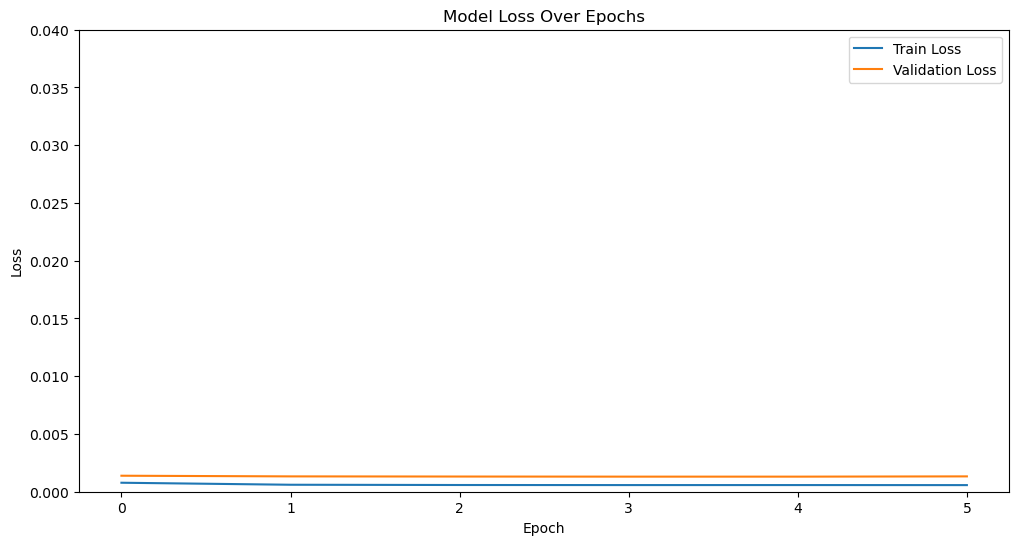

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim([0, 0.04])  # This line sets the y-axis limits
plt.legend(loc='upper right')
plt.show()

In [11]:
# Predicting on the test set
test_predictions = model.predict(test_X)

# RMSE (Root Mean Squared Error)
mse_metric = MeanSquaredError()
mse_metric.update_state(test_target, test_predictions)
rmse = sqrt(mse_metric.result().numpy())

# MAE (Mean Absolute Error)
mae_metric = MeanAbsoluteError()
mae_metric.update_state(test_target, test_predictions)
mae = mae_metric.result().numpy()

# MAPE (Mean Absolute Percentage Error)
mape_metric = MeanAbsolutePercentageError()
mape_metric.update_state(test_target, test_predictions)
mape = mape_metric.result().numpy()

rmse, mae, mape

96/96 [==============================] - 2s 4ms/step


(0.031046230961143565, 0.011436548, 44226.96)

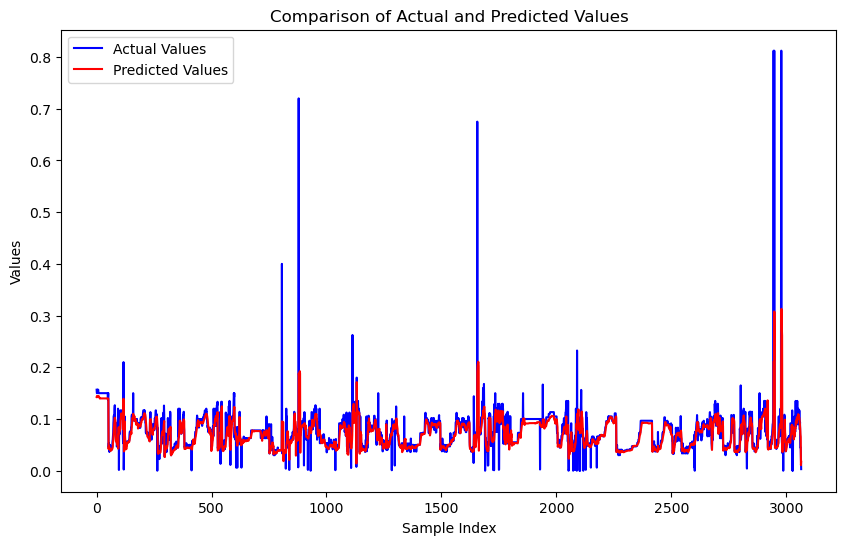

In [12]:
# Converting predictions and actual values to a compatible format for plotting
# Convert the Pandas Series to NumPy array before flattening
actual = np.array(test_target).flatten()
predicted = np.array(test_predictions).flatten()

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(actual, label='Actual Values', color='blue')
plt.plot(predicted, label='Predicted Values', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.show()